In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection                import train_test_split

import tensorflow
from tensorflow                             import data
from tensorflow                             import keras
from tensorflow.keras.preprocessing         import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image   import load_img,img_to_array, array_to_img
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models                import Sequential, Model
from tensorflow.keras.layers                import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer
from tensorflow.keras.applications          import VGG16, MobileNet
from tensorflow.keras.callbacks             import EarlyStopping



In [2]:
train_data = image_dataset_from_directory(
    directory='Final_Combined',
    labels='inferred',
    label_mode='categorical',
    # Use 20% data as testing data.
    validation_split=0.2,
    subset="training",
    # Set seed to ensure the same split when loading testing data.
    seed=123,
    batch_size=32,
    image_size=(128, 128),
)

test_data = image_dataset_from_directory(
    directory='Final_Combined',
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset="validation",
    seed=123,
    batch_size=32,
    image_size=(128, 128),
)

Found 74185 files belonging to 62 classes.
Using 59348 files for training.
Found 74185 files belonging to 62 classes.
Using 14837 files for validation.


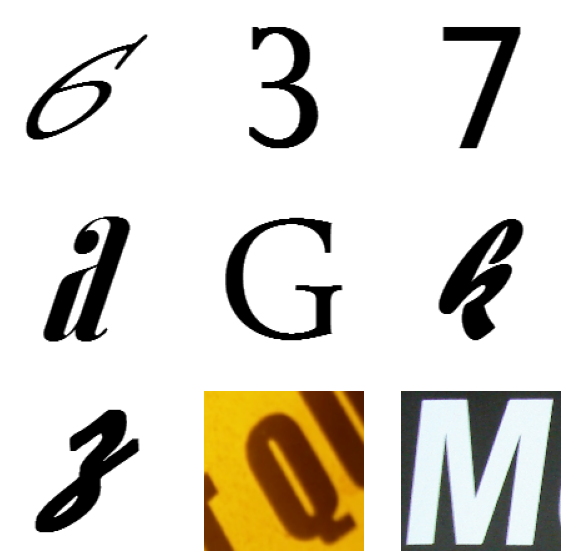

In [3]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [4]:
early_stopping = EarlyStopping(
    monitor="loss",
    min_delta=0,
    patience=1,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [5]:
Initial_NN = Sequential()

Initial_NN.add(InputLayer(input_shape=(128,128,3)))

# Conv block 1.  You can add more conv steps to
# each block to increase model capacity.
Initial_NN.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
Initial_NN.add(MaxPooling2D())

# Conv block 2 - note we increase filter dimension as we move
# further into the network. You can add more conv steps to
# each block to increase model capacity.
Initial_NN.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
Initial_NN.add(MaxPooling2D())

# Conv block 3 - The conv blocks should be ended with either a flatten
# layer or a global pooling layer. These transform the 2D layers to 1D
# to match the following dense layers.
Initial_NN.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))
Initial_NN.add(MaxPooling2D())

# Conv block 4 - The conv blocks should be ended with either a flatten
# layer or a global pooling layer. These transform the 2D layers to 1D
# to match the following dense layers.
Initial_NN.add(Conv2D(filters=40, kernel_size=3, activation='relu', padding='same'))
Initial_NN.add(MaxPooling2D())

Initial_NN.add(GlobalAveragePooling2D())

# Fully connected block - flattening followed by dense and output layers
# NN.add(Flatten())
Initial_NN.add(Dense(62, activation='relu'))
Initial_NN.add(Dense(62, activation='softmax'))  # 10 target classes

Initial_NN.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
Initial_NN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 20)        1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 30)        5430      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 40)        1

In [6]:
History_Nn = Initial_NN.fit_generator(train_data, epochs=10, callbacks=[early_stopping])  # track progress as we fit)


/Users/waltertyrna/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1855/1855 [==============================] - 284s 153ms/step - loss: 3.6955 - accuracy: 0.1631
Epoch 2/10
1855/1855 [==============================] - 280s 151ms/step - loss: 1.3470 - accuracy: 0.6208
Epoch 3/10
1855/1855 [==============================] - 281s 151ms/step - loss: 1.0662 - accuracy: 0.6826
Epoch 4/10
1855/1855 [==============================] - 280s 151ms/step - loss: 0.9344 - accuracy: 0.7098
Epoch 5/10
1855/1855 [==============================] - 280s 151ms/step - loss: 0.8399 - accuracy: 0.7316
Epoch 6/10
1855/1855 [==============================] - 280s 151ms/step - loss: 0.7802 - accuracy: 0.7456
Epoch 7/10
1855/1855 [==============================] - 280s 151ms/step - loss: 0.7298 - accuracy: 0.7571
Epoch 8/10
1855/1855 [==============================] - 280s 151ms/step - loss: 0.6822 - accuracy: 0.7692
Epoch 9/10
1855/1855 [==============================] - 281s 151ms/step - loss: 0.6564 - accuracy: 0.7755
Epoch 10/10
1855/1855 [=======================

In [7]:
score = Initial_NN.evaluate(test_data)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

464/464 [==============================] - 32s 68ms/step - loss: 0.7483 - accuracy: 0.7554
Test loss: 0.7482762336730957 / Test accuracy: 0.755408763885498


In [41]:
Initial_NN.save("Initial_NN_model_30Nov")


INFO:tensorflow:Assets written to: Initial_NN_model_30Nov/assets


In [25]:
# note we exclude the final dense layers by setting include_top=False,
# and add new ones to train from scratch below

Mobile_Net = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(128,128,3))
 
# Freeze convolutional layers
for layer in Mobile_Net.layers:
    layer.trainable = False    
 
    


In [26]:
# Freeze convolutional layers
for layer in Mobile_Net.layers:
    layer.trainable = False  

In [36]:
Transfer_Plus = Sequential()

Transfer_Plus.add(Mobile_Net)

Transfer_Plus.add(InputLayer(input_shape=(128,128,3)))

# Conv block 1.  You can add more conv steps to
# each block to increase model capacity.
Transfer_Plus.add(Dense(512, activation='relu', input_shape=(128,128,3)))
#Transfer_Plus.add(MaxPooling2D((2,2), padding='same'))

# Conv block 2 - note we increase filter dimension as we move
# further into the network. You can add more conv steps to
# each block to increase model capacity.
Transfer_Plus.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
#Transfer_Plus.add(MaxPooling2D())

# Conv block 3 - The conv blocks should be ended with either a flatten
# layer or a global pooling layer. These transform the 2D layers to 1D
# to match the following dense layers.
Transfer_Plus.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))
#Transfer_Plus.add(MaxPooling2D())

# Conv block 4 - The conv blocks should be ended with either a flatten
# layer or a global pooling layer. These transform the 2D layers to 1D
# to match the following dense layers.
Transfer_Plus.add(Conv2D(filters=40, kernel_size=3, activation='relu', padding='same'))
#Transfer_Plus.add(MaxPooling2D())

Transfer_Plus.add(GlobalAveragePooling2D())

# Fully connected block - flattening followed by dense and output layers
# NN.add(Flatten())
Transfer_Plus.add(Dense(62, activation='relu'))
Transfer_Plus.add(Dense(62, activation='softmax'))  # 10 target classes

# define formal model object to train and compile it as usual

Transfer_Plus.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
Transfer_Plus.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
input_15 (InputLayer)        multiple                  0         
_________________________________________________________________
dense_17 (Dense)             (None, 4, 4, 512)         524800    
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 20)          92180     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 30)          5430      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 4, 4, 40)          10840     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 40)               

In [37]:
history_TP = Transfer_Plus.fit_generator(train_data, epochs=10, callbacks=[early_stopping])


/Users/waltertyrna/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1855/1855 [==============================] - 371s 199ms/step - loss: 1.9869 - accuracy: 0.4415
Epoch 2/10
1855/1855 [==============================] - 370s 200ms/step - loss: 0.7463 - accuracy: 0.7437
Epoch 3/10
1855/1855 [==============================] - 368s 198ms/step - loss: 0.5891 - accuracy: 0.7891
Epoch 4/10
1855/1855 [==============================] - 368s 198ms/step - loss: 0.5000 - accuracy: 0.8136
Epoch 5/10
1855/1855 [==============================] - 368s 198ms/step - loss: 0.4340 - accuracy: 0.8340
Epoch 6/10
1855/1855 [==============================] - 369s 199ms/step - loss: 0.3884 - accuracy: 0.8483
Epoch 7/10
1855/1855 [==============================] - 369s 199ms/step - loss: 0.3526 - accuracy: 0.8602
Epoch 8/10
1855/1855 [==============================] - 370s 199ms/step - loss: 0.3255 - accuracy: 0.8702
Epoch 9/10
1855/1855 [==============================] - 368s 199ms/step - loss: 0.3009 - accuracy: 0.8805
Epoch 10/10
1855/1855 [=======================

In [38]:
score = Transfer_Plus.evaluate(test_data)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

464/464 [==============================] - 86s 184ms/step - loss: 0.6922 - accuracy: 0.8080
Test loss: 0.6922209858894348 / Test accuracy: 0.8080474734306335


In [40]:
Transfer_Plus.save("Transfer_Plus_model_30Nov")


INFO:tensorflow:Assets written to: Transfer_Plus_model_30Nov/assets
